In [215]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm

# Engineering Pattern Recognition:

## _A Practical Summary - Part 2: Regression_

### Part 1 Recap


#### Types of Machine Learning

- Supervised: input $\mathbf{x}_i$ and output $\mathbf{y}_i$ data available to _train_ algorithms
$$
\mathcal{D} = \{\mathbf{x}_i, \mathbf{y}_i\}_{i=1}^N
$$
Goal is to provide a _mapping_ from the inputs to the outputs

<img src="https://www.hackneycitizen.co.uk/wp-content/uploads/Paul.Smith-credit-stephen-mcgrath-009.jpg" width="500"/>

(_Hackney Citizen, 2013_)

- Unsupervised: Find interesting patterns in input data only - less well defined

$$
\mathcal{D} = \{\mathbf{x}_i\}_{i=1}^N
$$

#### Previously: Categorisation

<img src="images/cat_eg.png" width="250"/>

#### Next: Regression...
$$
y_i = f(x_i)
$$

<img src="images/regression_eg.png" width="300"/>

(_P. Gardner, 2019_)

### Supervised learning Mk2: Regression

#### Guided waves in a plate
<img src="images/AE_regression.png" width="350"/>

(_M. Hayward-Alexander, 2020_)

<img src="images/FRF.png" width="600"/>


### Case Study: Wind Turbine Power Curves

- Specific relationship between power produced and wind speed for a turbine
- Useful for monitoring, design, control

<img src="https://blog.matric.com/hs-fs/hubfs/offshore%20wind%20turbine%20design.jpg?width=600&name=offshore%20wind%20turbine%20design.jpg" width="400"/>

(_Windurance, Oct 2019_)


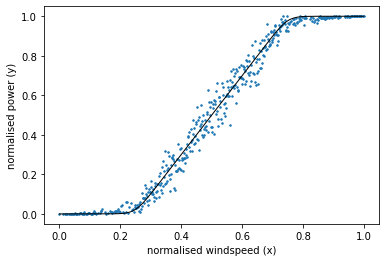

In [640]:
# soft clip to approximate a power-curve
pc = lambda x,p: 1/p * np.log((1+np.exp(p*(x-.5))) / (1+np.exp(p*((x-.5)-1))))
No = 600
xo = np.linspace(-0,2,No) # inputs
s = .06 * np.hanning(No) # input-dependant noise
yo = pc(xo, 30) + norm.rvs(loc=0, scale=s)
# clip power to prevent >1 and <0
y = yo[(yo<1)&(yo>0)]
x = xo[(yo<1)&(yo>0)]/2
N = x.size # update N

# plot
plt.plot(x, y, '.', markersize=3)
plt.plot(x, pc(x*2, 30), 'k', linewidth=1)
plt.ylabel('normalised power (y)')
plt.xlabel('normalised windspeed (x)')
plt.show()

### Linear Regression

$$
\begin{align}
\hat{y}_i &= m x_i + c  \nonumber \\
&= w_1 x_i + w_0 \nonumber
\end{align}
$$

Write in in **vector** notation

$$
\hat{y}_i = \mathbf{w}^\top \mathbf{x}_i = w_1 x_i + w_0
$$

where

$$
\mathbf{w} = [w_1, w_0]^\top, \quad \mathbf{x}_i = [x_i, 1]^\top
$$

or, **vector/matrix** notation, for the whole dataset,

\begin{align}
\mathbf{y} &= \begin{bmatrix}
       y_{1} \\
       y_{2} \\
       \vdots \\
       y_{N}
     \end{bmatrix} \nonumber
\end{align}

\begin{align}
\mathbf{X} &= \begin{bmatrix}
       \mathbf{x}_{1} \\
       \mathbf{x}_{2} \\
       \vdots \\
       \mathbf{x}_{N}
     \end{bmatrix}
     =
     \begin{bmatrix}
       x_1, 1 \\
       x_2, 1 \\
       \vdots \\
       x_N, 1
     \end{bmatrix} \nonumber
\end{align}

\begin{align}
\hat{\mathbf{y}} &= \mathbf{X}\mathbf{w} \nonumber \\
     &=
     \begin{bmatrix}
       w_1 x_1 + w_0 \\
       w_1 x_2 + w_0 \\
       \vdots \\
       w_1 x_N + w_0
     \end{bmatrix} \nonumber
\end{align}

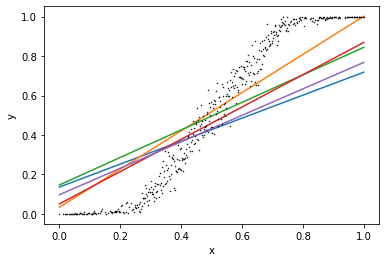

In [641]:
# sample some examples of linear regression
X = np.column_stack([x, np.ones((N,1))])
# 
for _ in range(5):
    # sample random values between O and 1 for the gradient and
    # 0 and .2 for the intercept
    w = np.random.random_sample(2)*[1, .2]
    y_hat = X @ w
    plt.plot(x, y_hat)

plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y, 'k.', markersize=1)
plt.show()

### Learning the Weights $\mathbf{w}$ of a _Good_ Model - Least Squares Solution


Intuitively, minimise the error (or distance) between predicted $\hat{y}_i$ outputs, and the **training** outputs $y_i$:

$$
(y_i - \hat{y}_i)^2
$$

Averaged loss for the training data, 
$$
\mathcal{L} = 1/N \sum_{i=1}^N(y_i - \mathbf{w}^\top\mathbf{x}_i)^2
$$

In matrix form,
$$
\mathcal{L} = 1/N (\mathbf{y} - \mathbf{X}\mathbf{w})^\top(\mathbf{y} - \mathbf{X}\mathbf{w})
$$

A good model can be viewed as one with the lowest loss, i.e.
$$
\textrm{argmin}_{\mathbf{w}} \mathcal{L}
$$

To minimise, take derivative w.r.t. $\mathbf{w}$ and set to zero, leading to,

$$
\hat{\mathbf{w}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

For a nice explanation, see: (_Rogers, Girolami, 2017_)

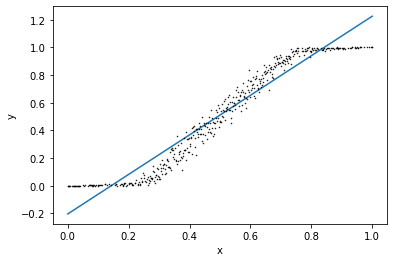

In [468]:
# find optimal weights
# define training and test indices: 50% test-train split
train = np.random.choice(N, int(N/2), replace=False)
test = np.setdiff1d(range(N), train)


w  = np.linalg.inv(X[train,:].T @ X[train,:]) @ X[train,:].T @ y[train]
y_hat = X @ w

# plot
plt.plot(x, y_hat)
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y, 'k.', markersize=1)
plt.show()

### Linear Regression - A Nonlinear Response

A linear output is too restrictive...

Increase the order of the polynomial:
$$
\begin{align}
\hat{y}_i = w_2 x_i^2 + w_1 x_i + w_0 \nonumber
\end{align}
$$

Write in in **vector** notation

$$
\hat{y}_i = \mathbf{w}^\top \mathbf{x}_i = w_2 x_i^2 + w_1 x_i + w_0
$$

where

$$
\mathbf{w} = [w_2, w_1, w_0]^\top, \quad \mathbf{x}_i = [x_i^2, x_i, 1]^\top
$$


or, **vector/matrix** notation, for the whole dataset,

\begin{align}
\mathbf{X} &= \begin{bmatrix}
       \mathbf{x}_{1} \\
       \mathbf{x}_{2} \\
       \vdots \\
       \mathbf{x}_{N}
     \end{bmatrix}
     =
     \begin{bmatrix}
       x_1^2, x_1, 1 \\
       x_2^2, x_2, 1 \\
       \vdots \\
       x_N^2, x_N, 1
     \end{bmatrix} \nonumber
\end{align}

The model is still linear in the parameters...
\begin{align}
\hat{\mathbf{y}} &= \mathbf{X}\mathbf{w}  \nonumber\\
     &=
     \begin{bmatrix}
       w_2 x_1^2 + w_1 x_1 + w_0 \\
       w_2 x_2^2 + w_1 x_2 + w_0 \\
       \vdots \\
       w_2 x_N^2 + w_1 x_N + w_0
     \end{bmatrix} \nonumber
\end{align}

Simply redefine $\mathbf{X}$, and find the same least squares solution...

- The model is still linear in the parameters

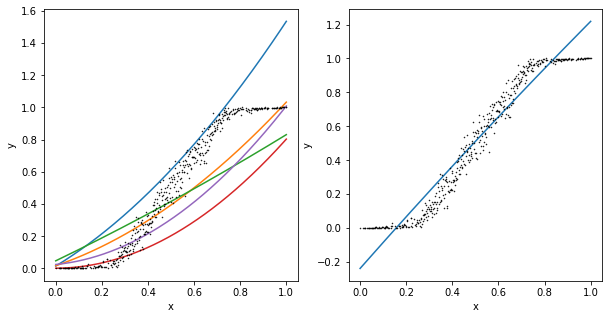

In [659]:
fig, axs = plt.subplots(1, 2, figsize=[10, 5]) # define figure

X2 = np.column_stack([x**2, x, np.ones((N,1))])
# random 
for _ in range(5):
    # sample random values
    w = np.random.random_sample(3)*[1, 1, .05]
    y_hat = X2 @ w
    axs[0].plot(x, y_hat)
# plot
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')
axs[0].plot(x, y, 'k.', markersize=1)

# optimal least squares
w  = np.linalg.inv(X2[train,:].T @ X2[train,:]) @ X2[train,:].T @ y[train]
y_hat = X2 @ w
# plot
axs[1].plot(x, y_hat)
axs[1].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].plot(x, y, 'k.', markersize=1)
plt.show()

Increase the order...?
\begin{align}
\hat{\mathbf{y}} &= \mathbf{X}\mathbf{w} \nonumber\\
     &=
     \begin{bmatrix}
       w_p x_1^P + \ldots + w_2 x_1^2 + w_1 x_1 + w_0 \\
       w_p x_2^P + \ldots + w_2 x_2^2 + w_1 x_2 + w_0 \\
       \vdots \\
       w_p x_N^P + \ldots + w_2 x_N^2 + w_1 x_N + w_0
     \end{bmatrix} \nonumber
\end{align}

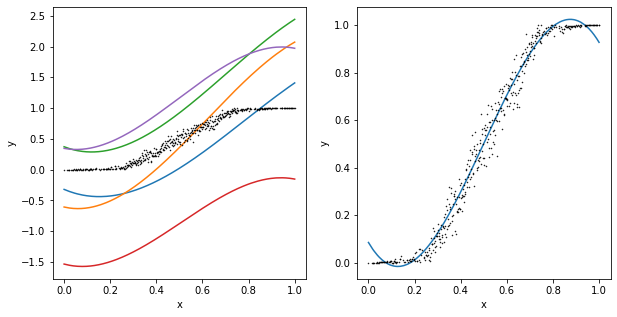

In [741]:
fig, axs = plt.subplots(1, 2, figsize=[10, 5]) # define figure

X3 = np.column_stack([x**3, x**2, x, np.ones((N,1))])
# random 
for _ in range(5):
    # sample random values (near-ish the LS solution)
    w = (np.random.randn(4)/1)+[-4, 7, -1, 0.05]
    y_hat = X3 @ w
    axs[0].plot(x, y_hat)
# plot
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')
axs[0].plot(x, y, 'k.', markersize=1)

# optimal least-squares solution
w  = np.linalg.inv(X3[train,:].T @ X3[train,:]) @ X3[train,:].T @ y[train]
y_hat = X3 @ w
# plot
axs[1].plot(x, y_hat)
axs[1].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].plot(x, y, 'k.', markersize=1)
plt.show()

#### Will increasing the order of the polynomial always improve the model...?

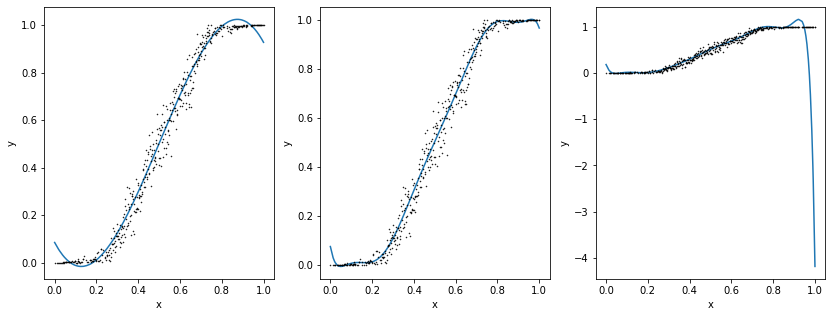

In [746]:
# test different values visually
Ps = [3, 9, 21]
# figure
fig, axs = plt.subplots(1, 3, figsize=[14, 5]) # define figure
for c,P in enumerate(Ps):
    # polynomial of order P
    Xp = np.column_stack([x**p for p in reversed(range(P+1))])
    # usual solution
    w  = np.linalg.inv(Xp[train,:].T @ Xp[train,:]) @ Xp[train,:].T @ y[train]
    y_hat = Xp @ w
    # plot
    axs[c].plot(x, y_hat)
    axs[c].set_ylabel('y')
    axs[c].set_xlabel('x')
    axs[c].plot(x, y, 'k.', markersize=1)

plt.show()

*NO*: over-training, poor generalisation!

### Leave-One-Out Cross-Validation

- trade-off between optimal model complexity and generalisation
- again some form of _validation_ is required

<img src="images/kfold.png" width="300"/>

(_Rogers, Girolami, 2017_)

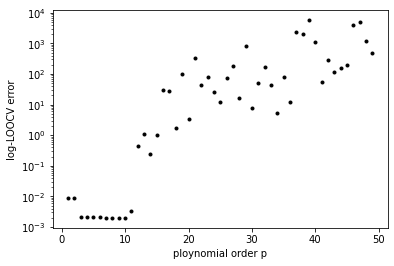

lowest LOOCV error: 9


In [744]:
Ps = range(1,50) # different orders of polynomial
score = []
for c, P in enumerate(Ps):    
    s = 0
    for i in train: # leave out each point in turn as a test point
        LOO_test = i
        LOO_train = np.setdiff1d(train, i) # separate from the rest
        # polynomial of order P
        Xp = np.column_stack([x**p for p in reversed(range(P+1))])
        # usual solution
        w  = (np.linalg.inv(Xp[LOO_train,:].T @ Xp[LOO_train,:]) 
              @ Xp[LOO_train,:].T @ y[LOO_train])
        y_hat = Xp[i,:] @ w
        s += (y[i]-y_hat)**2 # add error
    score.append(s/train.size) # average
# plot
plt.semilogy(range(1,50), score, 'k.')
plt.ylabel('log-LOOCV error')
plt.xlabel('ploynomial order p')
plt.show()

print('lowest LOOCV error: ' + str(Ps[np.argmin(score)]))

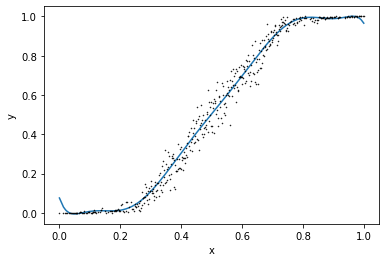

In [760]:
# polynomial of order P
P = 9
Xp = np.column_stack([x**p for p in reversed(range(P+1))])
# usual solution
w  = np.linalg.inv(Xp[train,:].T @ Xp[train,:]) @ Xp[train,:].T @ y[train]
y_hat = Xp @ w
# plot
plt.plot(x, y_hat)
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y, 'k.', markersize=1)
plt.show()

- does the model appear appropriate?
- alternative methods
    - different model structure (basis functions)
    - different definition of a _good_ model
    - accounting for noise
    

### Summary

- Regression - supervised learning for continuous outputs
- Case study with wind turbine power-curve data

### Comments & Extra Reading

- The effects of noise or outliers
- Regularised least squares, Maximum Likelihood approach (probabilistic)
- Use of alternative-basis functions, the Kernel-trick

<img src="https://images-na.ssl-images-amazon.com/images/I/51DzaniYNSL._SX351_BO1,204,203,200_.jpg" width="200"/>

### Thanks for listening!

any questions: <l.a.bull@sheffield.ac.uk>
